In [4]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats 
import statsmodels.formula.api as sm
import os
%matplotlib inline 

In [5]:
#reading the file and getting to know the data
print(os.getcwd())
data= pd.read_csv("insurance.csv")
data.head()
print(data.shape)

C:\Users\chauh\Downloads\Datasets\Untitled Folder
(1338, 7)


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
## differentiating numerical and categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtypes=="object"]
print(categorical_features)
numerical_features = [feature for feature in data.columns if feature not in categorical_features]
discrete_features = [feature for feature in numerical_features if data[feature].nunique()<10]
print(discrete_features)
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['sex', 'smoker', 'region']
['children']
['age', 'bmi', 'charges']


C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


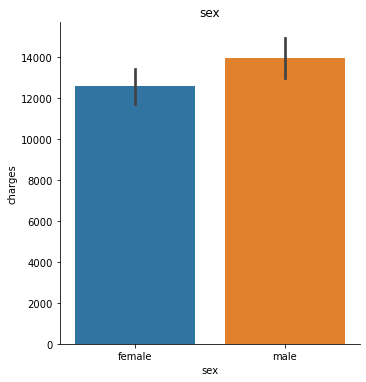

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


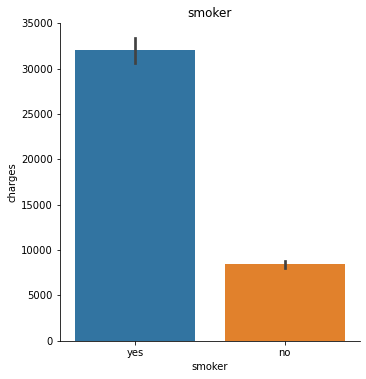

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


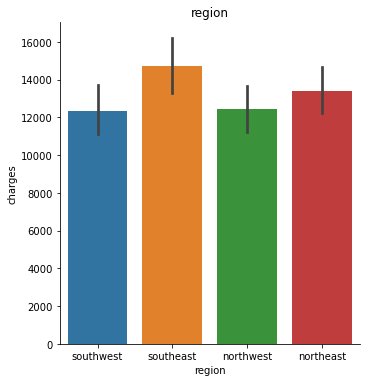

In [8]:
#Visuals for Categorical Features
for feature in categorical_features:
    sns.catplot(feature, "charges", data=data, kind="bar")
    plt.title(feature)
    plt.ylabel("charges")
    plt.xlabel(feature)
    plt.show()


C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


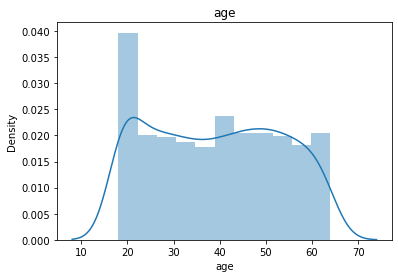

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


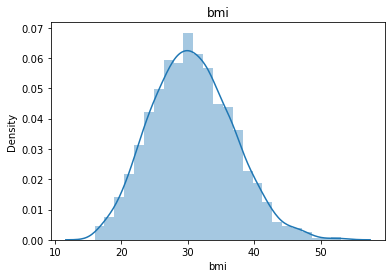

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


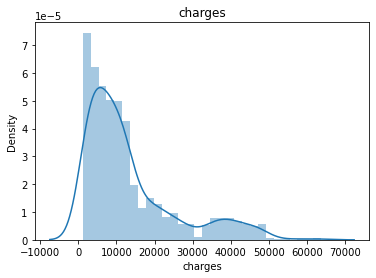

In [9]:
#Distribution plots of Continuous Features
for feature in continuous_features:
    sns.distplot(data[feature])
    plt.title(feature)
    plt.show()

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


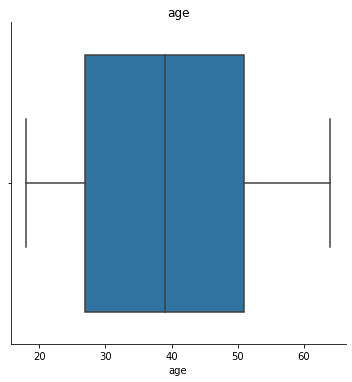

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


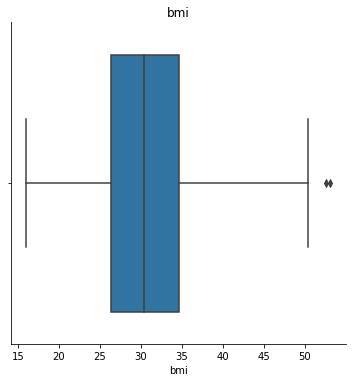

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


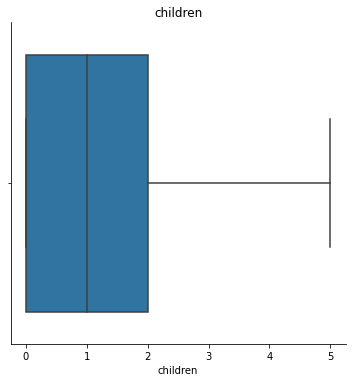

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


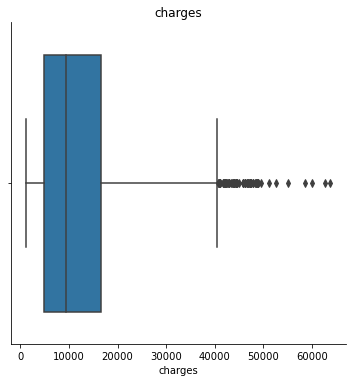

In [10]:
#assessing the outlier scenario of continuous variables
for feature in numerical_features:
    sns.catplot(feature, data=data,  kind="box", whis=2)
    plt.title(feature)
    plt.show()

In [11]:
q1= np.quantile(data["bmi"], 0.25)
q3= np.quantile(data["bmi"], 0.75)
whis = (q3-q1)*2
a = q1 - whis; b= q3+whis
index = [i for i in range(len(data["bmi"])) if data["bmi"].iloc[i] < a or data["bmi"].iloc[i] > b ]
print(data.iloc[index, :].sort_values(by="bmi"))


      age   sex    bmi  children smoker     region     charges
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627


In [12]:
#Bivariate EDA

<AxesSubplot:>

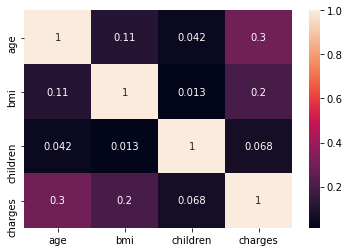

In [13]:
#obtaining the relationship between the variables
corr = data.corr()
sns.heatmap(corr, annot=True)

# hence, no significant correlation exist

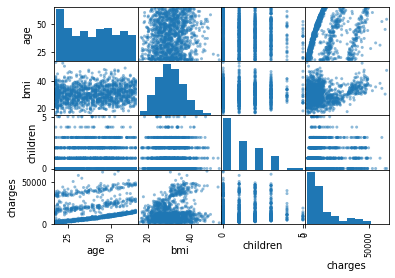

In [14]:
pd.plotting.scatter_matrix(data)
plt.show()

## CREATING TWO DATASETS

In [15]:
data_sm = data[data["smoker"]=="yes"]
data_nsm = data[data["smoker"]=="no"]

data_sm.drop("smoker",axis=1, inplace=True)
data_nsm.drop("smoker",axis=1, inplace=True)


print(data_sm.shape)
print(data_nsm.shape)

(274, 6)
(1064, 6)


C:\Users\chauh\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
#differentiating the features
cat_features_sm = [features for features in data_sm.columns if data[features].dtypes=="O"]
num_features_sm = [features for features in data_sm.columns if features not in cat_features_sm]
dis_features_sm = [features for features in num_features_sm if data[features].nunique()<=10 ]
cont_features_sm= [features for features in num_features_sm if features not in dis_features_sm]


cat_features_nsm = [features for features in data_nsm.columns if data[features].dtypes=="O"]
num_features_nsm = [features for features in data_nsm.columns if features not in cat_features_nsm]
dis_features_nsm = [features for features in num_features_nsm if data[features].nunique()<=10 ]
cont_features_nsm= [features for features in num_features_nsm if features not in dis_features_nsm]


### working with smoker dataset

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


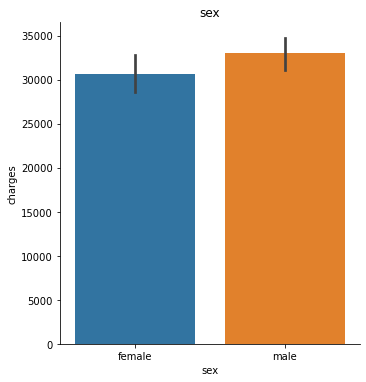

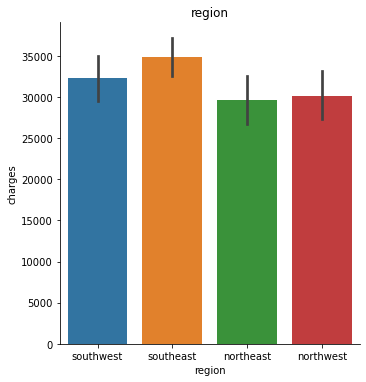

In [17]:
# Basic EDA
for features in cat_features_sm:
    sns.catplot(features, "charges",data=data_sm, kind="bar")
    plt.title(features)
    plt.xlabel(features)
    plt.ylabel("charges")

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


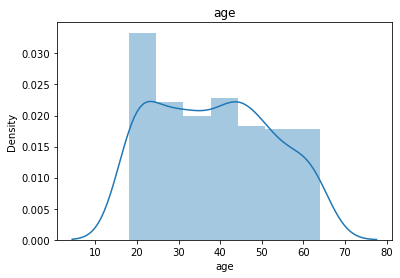

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


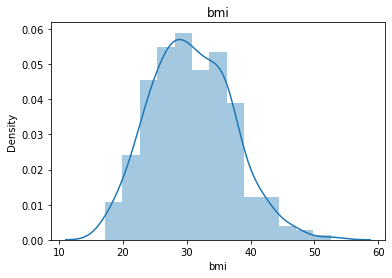

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


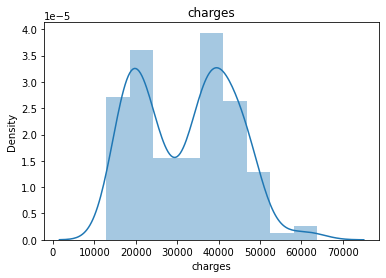

In [18]:
for features in cont_features_sm:
    sns.distplot(data_sm[features])
    plt.title(features)
    plt.xlabel(features)
    plt.show()

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[[1.         0.35356116]
 [0.35356116 1.        ]]


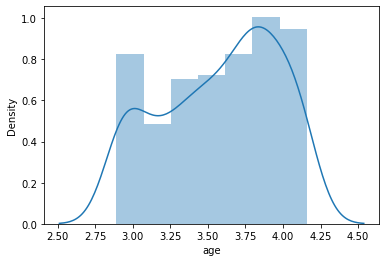

In [19]:
#trying transformation on data
a = data_sm["age"]
a = np.log(a)
sns.distplot(a)
print(np.corrcoef(a, data_sm["charges"]))
#no significant improvement in correlation

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


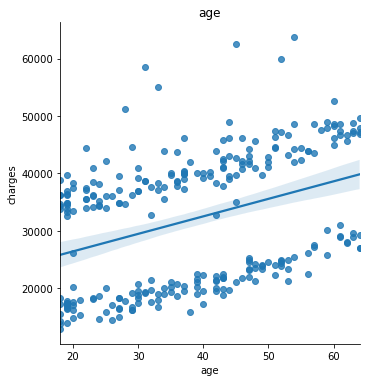

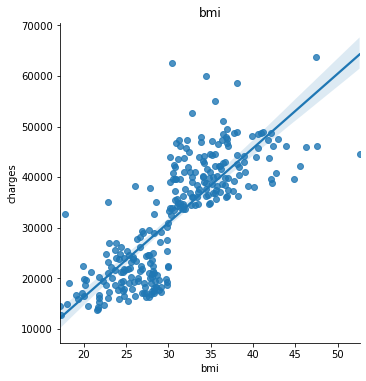

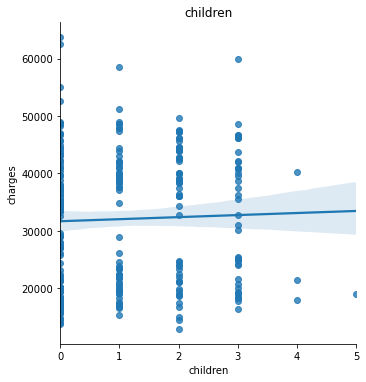

In [20]:
for features in num_features_sm:
    if features == "charges":
        pass
    else:
        sns.lmplot(features, "charges", data=data_sm)
        plt.title(features)
        plt.ylabel("charges")
        plt.xlabel(features)

<AxesSubplot:>

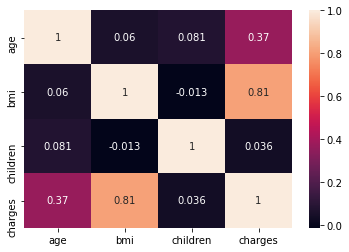

In [21]:
temp = data_sm.corr()
sns.heatmap(temp, annot=True)

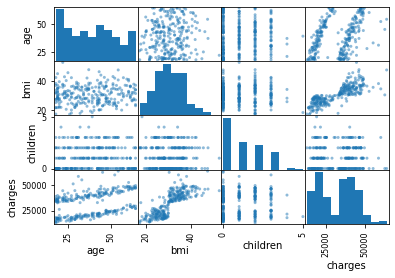

In [22]:
pd.plotting.scatter_matrix(data_sm)
plt.show()

In [23]:
model_sm = sm.ols("charges~bmi+age", data=data_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     413.6
Date:                Mon, 31 May 2021   Prob (F-statistic):           4.50e-83
Time:                        14:17:39   Log-Likelihood:                -2759.5
No. Observations:                 274   AIC:                             5525.
Df Residuals:                     271   BIC:                             5536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.237e+04   1931.856    -11.578      0.000   -2.62e+04   -1.86e+04
bmi         1438.0910     55.216     26.045      0.000    1329.384    1546.798
age          266.2922     25.058     10.627      0.000     216.958     315.626
==============================================================================
Omnibus:                       57.754   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.351
Skew:                           1.011   Prob(JB):                     1.82e-29
Kurtosis:                       5.739   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### working with non-smoker dataset

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


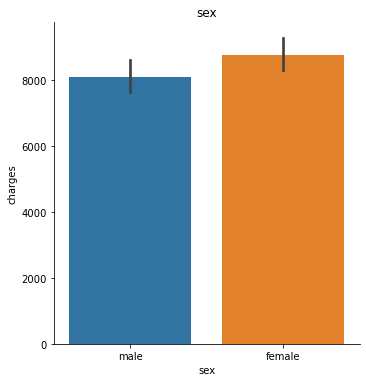

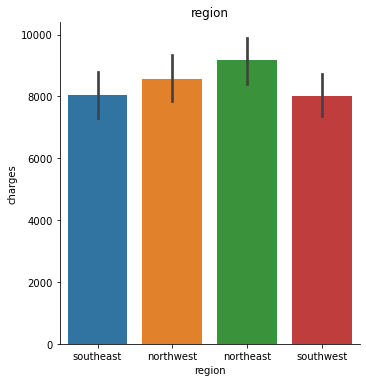

In [24]:
for features in cat_features_nsm:
    sns.catplot(features, "charges",data=data_nsm, kind="bar")
    plt.title(features)
    plt.xlabel(features)
    plt.ylabel("charges")

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


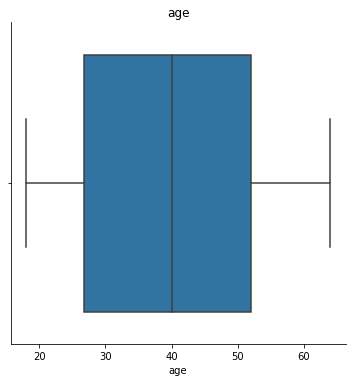

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


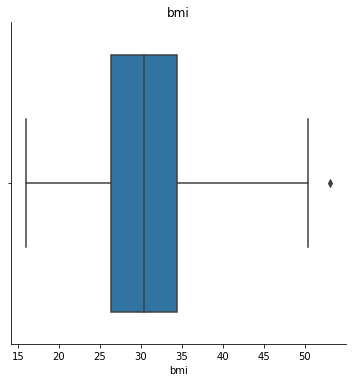

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


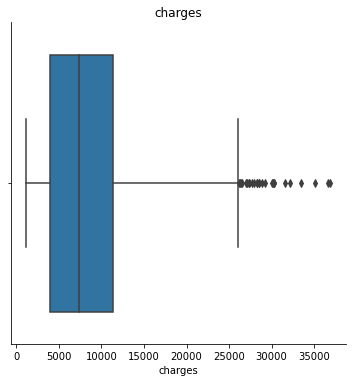

In [25]:
for features in cont_features_nsm:
    sns.catplot(features, data = data_nsm, kind="box", whis=2)
    plt.title(features)
    plt.show()

In [26]:
q1,q3 = data_nsm["bmi"].quantile([0.25,0.75])
print(q1,q2)
IQR = q3-q1
ul = q3+2*IQR
ll = q1-2*IQR
a = data_nsm[(data_nsm["bmi"]<ll) | (data_nsm["bmi"]>ul)]
print(a)

data_nsm = data_nsm[data_nsm["bmi"]<ul]

NameError: name 'q2' is not defined

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


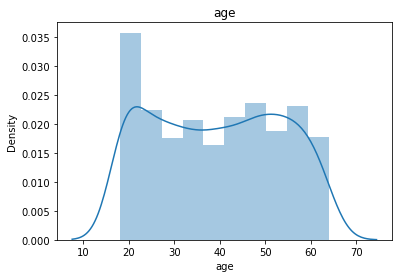

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


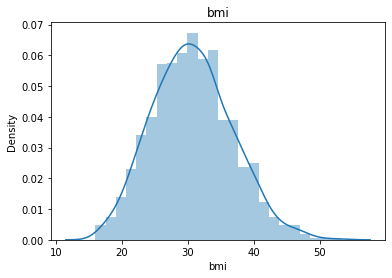

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


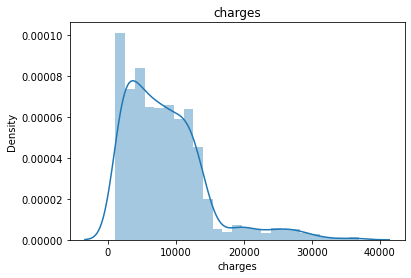

In [27]:
for features in cont_features_nsm:
    sns.distplot(data_nsm[features])
    plt.title(features)
    plt.xlabel(features)
    plt.show()

C:\Users\chauh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


      age     sex     bmi  children     region   charges    sq
1      18    male  33.770         1  southeast  7.453302   324
2      28    male  33.000         3  southeast  8.400538   784
3      33    male  22.705         0  northwest  9.998092  1089
4      32    male  28.880         0  northwest  8.260197  1024
5      31  female  25.740         0  southeast  8.231275   961
...   ...     ...     ...       ...        ...       ...   ...
1332   52  female  44.700         3  southwest  9.342393  2704
1333   50    male  30.970         3  northwest  9.268661  2500
1334   18  female  31.920         0  northeast  7.698927   324
1335   18  female  36.850         0  southeast  7.396233   324
1336   21  female  25.800         0  southwest  7.604867   441

[1064 rows x 7 columns]


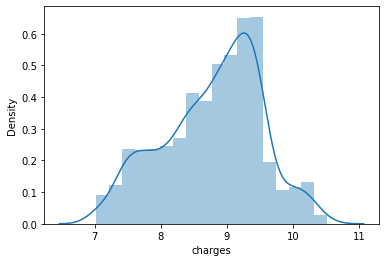

In [28]:
a =data_nsm.copy()
a["charges"] = np.log(a["charges"])
sns.distplot(a["charges"])
a["sq"] = a["age"]**2
print(a)

<AxesSubplot:>

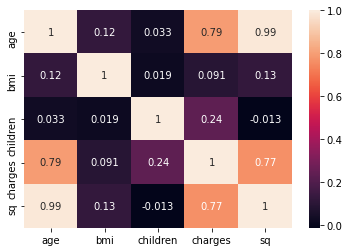

In [29]:
sns.heatmap(a.corr(), annot=True)

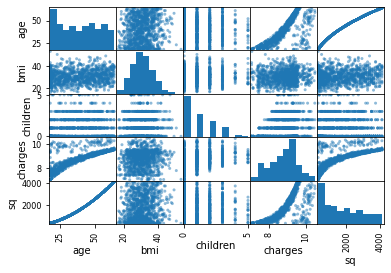

In [30]:
pd.plotting.scatter_matrix(a)
plt.show()

In [31]:
#ct = ColumnTransformer(transformers= ["encoder", OneHotEncoder(),[1,4]], remainder="passthrough")
#y = a.iloc[:, -1].values
#X = a.iloc[:, :-1].values
#ct.fit_transform(X)
#a.head()


In [32]:
model_nms = sm.ols("charges~children+sq", data=a).fit()

In [33]:
model_nms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     978.4
Date:                Mon, 31 May 2021   Prob (F-statistic):          1.48e-241
Time:                        14:17:59   Log-Likelihood:                -638.86
No. Observations:                1064   AIC:                             1284.
Df Residuals:                    1061   BIC:                             1299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7361      0.028    277.273      0.000       7.681       7.791
children       0.1497      0.011     13.457      0.000       0.128       0.172
sq             0.0005    1.2e-05     42.307      0.000       0.000       0.001
==============================================================================
Omnibus:                      513.995   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2776.480
Skew:                           2.233   Prob(JB):                         0.00
Kurtosis:                       9.533   Cond. No.                     4.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""